# Model NEATM 余亮亮 修改 $\alpha, \phi$
$D_{eff}=\frac{1329\times10^{-H_v/5}}{\sqrt{p_v}}$
$p_v=\frac{A_B}{q}$
$q_s=\frac{F_{sun}}{d^2}$
$T_{fit}=[\frac{(1-A)F_{sun}}{\eta\epsilon\sigma d}]^{1/4}$
$T=T(\theta,\phi)=T_{fit}\cos^{1/4}\theta\cos^{1/4}\phi,(-\frac{\pi}{2}<\theta<\frac{\pi}{2},-\frac{\pi}{2}<\phi<\frac{\pi}{2})$
$F_\lambda=F(\Delta,d,\alpha|\eta,D)$

$F_\lambda=\frac{\epsilon D^2}{2\Delta ^2}\frac{\pi h c^2}{\lambda ^5}\int_{-\pi/2}^{\pi/2}d\phi\int_{\alpha-\pi/2}^{\pi/2}\frac{1}{exp(\frac{hc}{\lambda kT(\theta,\phi)}-1)}\cos^2 \phi\cos(\alpha-\theta)d\theta$


# Model NEATM 余亮亮 修改 $\alpha, \phi$
$D_{eff}=\frac{1329\times10^{-H_v/5}}{\sqrt{p_v}}$
$p_v=\frac{A_B}{q}$
$q_s=\frac{F_{sun}}{d^2}$
$T_{fit}=[\frac{(1-A)F_{sun}}{\eta\epsilon\sigma d}]^{1/4}$
$T=T(\theta,\phi)=T_{fit}\cos^{1/4}\theta\cos^{1/4}\phi,(-\frac{\pi}{2}<\theta<\frac{\pi}{2},-\frac{\pi}{2}<\phi<\frac{\pi}{2})$
$F_\lambda=F(\Delta,d,\alpha|\eta,D)$

$F_\lambda=\frac{\epsilon D^2}{2\Delta ^2}\frac{\pi h c^2}{\lambda ^5}\int_{-\pi/2}^{\pi/2}d\phi\int_{\alpha-\pi/2}^{\pi/2}\frac{1}{exp(\frac{hc}{\lambda kT(\theta,\phi)}-1)}\cos^2 \phi\cos(\alpha-\theta)d\theta$


# Model NEATM 余亮亮 修改 $\alpha, \phi$
$D_{eff}=\frac{1329\times10^{-H_v/5}}{\sqrt{p_v}}$
$p_v=\frac{A_B}{q}$
$q_s=\frac{F_{sun}}{d^2}$
$T_{fit}=[\frac{(1-A)F_{sun}}{\eta\epsilon\sigma d}]^{1/4}$
$T=T(\theta,\phi)=T_{fit}\cos^{1/4}\theta\cos^{1/4}\phi,(-\frac{\pi}{2}<\theta<\frac{\pi}{2},-\frac{\pi}{2}<\phi<\frac{\pi}{2})$
$F_\lambda=F(\Delta,d,\alpha|\eta,D)$

$F_\lambda=\frac{\epsilon D^2}{2\Delta ^2}\frac{\pi h c^2}{\lambda ^5}\int_{-\pi/2}^{\pi/2}d\phi\int_{\alpha-\pi/2}^{\pi/2}\frac{1}{exp(\frac{hc}{\lambda kT(\theta,\phi)}-1)}\cos^2 \phi\cos(\alpha-\theta)d\theta$


### test Fortran

In [1]:
import os
d = 1.12554
delta = 1.14078
alpha = 0
D = 40.0
lamda = 12.0
eta = 1.23
A = 0.0505
para = str(d)+' '+str(delta)+' '+str(alpha)+' '+str(D)+' '+str(lamda)+' '+str(eta)+' '+str(A)
exe ='./a.out '+' '+para 
ret = os.system(exe)
f = os.popen(exe)
print("hello=",f.readline())
f.close()
#print('./a.out '+' '+para)


hello= 


sh: 1: ./a.out: not found
/bin/sh: 1: ./a.out: not found


32512

# MCMC_NEATM

## define const & import

In [2]:
#import
import numpy as np
import matplotlib.pyplot as plt
import math as mh 
import pandas as pd
from tqdm import tqdm
import os
#constant
Fsun = 1367.5           # sun constant
sigma = 5.67E-8         #stefan-boltzmann constant
h = 6.626007015E-34     #plank constant
#q = 0.29+0.684*0.15    #phase integral = 0.29+0.684*G(=0.15)
epsi = 0.9              #radiance epsilon
kB = 1.38064852E-23     #boltzmann constant  j/k
cl = 299792458.0        #lightspeed m/s
au = 149597870700.0
pi = 3.1415926535
eta_guess = [1.2,0.7]
D_guess = [400,200000]
logf_guess = [1,0.1,1]
eta_piror = [0.5,2.8]
D_piror = [0,2500000]
Hv = 21.3
G = 0.15
Ndd = 15
lamdai = [12,22]

## define MODEL FUNCTION
initial x:flux = delta, it will change "delta"!
list: a,b
a = b
a = b[:]

In [3]:
def neatm_ohhq(Ndd,eta,D,delta,dd,alpha,lamda,A):   
    summ = 0.
    a = alpha-pi/2
    b = pi/2
    c = -pi/2          
    d = pi/2
    Tfit = np.power((1-A)*Fsun/(eta*epsi*sigma*dd*dd),0.25)
    #print(f"Tss = {Tfit-273}\n")
    dxdy = ((b-a)*(d-c)/(Ndd*Ndd)) 
    for j in range(Ndd):
        for i in range(Ndd):
            phii = (c+(d-c)*j/Ndd)
            thei = (a+(b-a)*i/Ndd)
            T = Tfit*np.power(np.cos(thei),0.25)*np.power(np.cos(phii),0.25)
            #print(f"Tss = {T-273}\n")
            integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
            summ = summ + dxdy*integral
    #print('hhq',delta)
    F = (epsi*np.power(D,2)*pi*h*cl*cl)*summ/(2*np.power(delta*au,2)*np.power(lamda,5))

    F = F*(lamda)**2/cl*1e29
    #print('hhq2',delta)
    return F
def Model_neatm_ohhq(theta,x,lamda):
    eta,D = theta
    
    delta,d,alpha = x
    lamda1,lamda2 = lamda
    #print("neatm ",delta)
    pv = (1329*pow(10,-Hv/5)/(D*0.001))**2
    q = 0.29+0.684*G
    A = q*pv
    #initial flux
    flux = np.zeros(len(delta))
    nn = int(len(flux))
    for i in range(0,(int(nn/2))-1):
        flux[i] = neatm_ohhq(Ndd,eta,D,delta[i],d[i],alpha[i],lamda1*1e-6,A)
    for i in range(int(nn/2),nn):
        flux[i] = neatm_ohhq(Ndd,eta,D,delta[i],d[i],alpha[i],lamda2*1e-6,A)
        #print("neatm",i,'=',delta[i])
    #print('2',delta)
    return flux

In [4]:
#ret = os.popen('./a.out 2 6')
#a1 = ret.readlines()
def Model_neatm_hhq(theta,x,lamda):
    eta,D = theta
    delta,d,alpha = x
    lamda1,lamda2 = lamda
    #print("neatm ",delta)
    pv = (1329*pow(10,-Hv/5)/(D*0.001))**2
    q = 0.29+0.684*G
    A = q*pv
    #initial flux
    flux = np.zeros(len(delta))
    nn = int(len(flux))
    for i in range(0,(int(nn/2))-1):
        ret = os.system('./neatm '+str(eta)+' '+str(D)+' '+str(delta[i])+' '+str(d[i])+' '+str(alpha[i])+' '+str(lamda1)+' '+str(A)+' '+str(Ndd))
        #print('./neatm '+str(eta)+' '+str(D)+' '+str(delta[i])+' '+str(d[i])+' '+str(alpha[i])+' '+str(lamda1)+' '+str(A))
        flux[i] = ret
    for i in range(int(nn/2),nn):
        ret = os.system('./neatm '+str(eta)+' '+str(D)+' '+str(delta[i])+' '+str(d[i])+' '+str(alpha[i])+' '+str(lamda2)+' '+str(A)+' '+str(Ndd))
        flux[i] = ret
        #print("neatm",i,'=',delta[i])
    #print('2',delta)
    return flux

In [5]:
#ret = os.popen('./a.out 2 6')
def Model_neatm_fort(theta,x,lamda):
    eta,D = theta
    delta,d,alpha = x
    lamda1,lamda2 = lamda
    #print("neatm ",delta)
    pv = (1329*pow(10,-Hv/5)/(D*0.001))**2
    q = 0.29+0.684*G
    A = q*pv
    #initial flux
    flux = np.zeros(len(delta))
    nn = int(len(flux))
    for i in range(0,(int(nn/2))-1):
        para = str(d[i])+' '+str(delta[i])+' '+str(alpha[i])+' '+str(D)+' '+str(lamda1)+' '+str(eta)+' '+str(A)
        exe ='./a.out '+' '+para 
        f = os.popen(exe)
        flux[i] = f.readline()
        f.close()
    for i in range(int(nn/2),nn):
        para = str(d[i])+' '+str(delta[i])+' '+str(alpha[i])+' '+str(D)+' '+str(lamda2)+' '+str(eta)+' '+str(A)
        exe ='./a.out '+' '+para 
        f = os.popen(exe)
        flux[i] = f.readline()
        f.close()
    return flux

In [6]:
#constants---------------------------------------------------------------------------
#emissivity:
epsi = 0.9
#stefan-boltzman:
sigmas = 5.67*10**(-8)
#solar constant:
f_solar = 1367.5
#planck constant:
h = 6.62607015 * 10 ** (-34)
#speed of light
c = 3.0 * 10 ** 8 
#boltzmann constant
kb = 1.380649 * 10 ** (-23)
#astronomical unit in unit of meter
au = 1.496 * 10 ** 11
def neatm_jhx(Ndd,dast,dao,alpha,Dia,wlenth,yita,A):
    #dast: distance from asteroid to Sun :d
    #dobs: distance from observer to Sun  :dd
    #dao:  distance from asteroid to observer :delta
    #alpha: solar phase
    #dia: diameter of asteroid
    #wlenth: wavelength
    #yita: beaming parameter
    #A: bond albedo
	
	T_ss = ((1 - A) * f_solar / epsi / yita / sigmas / dast ** 2) ** 0.25
	Nd = int(Ndd)
	phi = np.zeros((Nd-1,1))
	theta = np.zeros((Nd-1,1))
	for i in range(0,Nd-1):#phi , theta is the angle from subsolar point
			phi[i] = -pi/2.0 + i * pi / Nd
			theta[i] = -pi/2.0 + i * pi / Nd
	nj = np.floor(((alpha - pi / 2.0) + pi / 2.0) / (pi / Nd)) 
	dphi, dtheta = pi/Nd,pi/Nd
	ss = dphi*dtheta#dtheta*dphi
	wlenth = wlenth * 10 ** (-6)
	temp = np.zeros((len(phi),len(theta)))
	flux = 0.0
	flux_con = epsi * Dia ** 2 * pi  * h * c ** 2  / (wlenth ** 5)
	for j in range(0,len(phi)):
		for k in range(int(nj),len(theta)):
			temp[j,k] = T_ss * np.cos(theta[k]) ** 0.25 * np.cos(phi[j]) ** 0.25
			flux = flux + flux_con * abs(np.cos(phi[j]) ** 2) * abs(np.cos(alpha - theta[k])) / (2 * (dao * au) ** 2) / (np.exp(h * c / (wlenth * kb * temp[j,k])) - 1) * ss * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy
	return flux
def Model_neatm_jhx(theta,x,lamda):
    eta,D =theta
    delta,d,alpha = x
    lamda1,lamda2 = lamda
    pv = (1329*pow(10,-Hv/5)/(D*0.001))**2
    q = 0.29+0.684*G
    A = q*pv
    nn = len(delta)
    flux = np.zeros(nn)
    for i in range(0,int(nn/2)):
        fluxi = neatm_jhx(Ndd,d[i],delta[i],alpha[i],D,lamda1,eta,A)
        if fluxi!=fluxi:fluxi = 0
        flux[i] = fluxi
    for i in range(int(nn/2),nn):
        fluxi = neatm_jhx(Ndd,d[i],delta[i],alpha[i],D,lamda2,eta,A)
        if fluxi!=fluxi:fluxi = 0
        flux[i] = fluxi
        
    #print('hello',flux)
    return flux

## read data file

处理原始数据 将坐标垂直叠加，方便直接计算12，22微米的流量

In [7]:
namelist = ['2003MA3','2010CO1','2010DG77','2010EX11','2010FC81','2010FH81','2010GS7','2010JN71','2010KX7','2010PW58','2010XP69','2019DD2']
name = namelist[4].lower()
name = '2010pw58'
name

'2010pw58'

计算delta d 看看对不对

In [8]:
obsec = np.loadtxt(f'newepoch_{name}.txt')
#print(obsec)
d_N = np.sqrt(obsec[:,0]**2+obsec[:,1]**2+obsec[:,2]**2)
delta_N = np.sqrt((obsec[:,3]-obsec[:,0])**2+(obsec[:,4]-obsec[:,1])**2+(obsec[:,5]-obsec[:,2])**2)
#earth-sun
print(delta_N)
dd_N = np.sqrt(obsec[:,3]**2+obsec[:,4]**2+obsec[:,5]**2)
alpha_N = (delta_N*delta_N+d_N*d_N-dd_N*dd_N)/(2*delta_N*d_N)
alpha_N = np.arccos(alpha_N)
alpha_N/pi*180

[0.25813743 0.25808508 0.25803259 0.25797977 0.25776627 0.25760371
 0.25754898 0.25732791 0.25727211 0.25727201 0.25721597 0.2571597
 0.25715959 0.25710309 0.25704624 0.25698927 0.25693195 0.25675884
 0.15993854 0.15993851 0.15991336 0.1598895  0.15986693 0.15985611
 0.15984564 0.15983547 0.25813743 0.25808508 0.25803259 0.25797977
 0.25776627 0.25760371 0.25754898 0.25732791 0.25727211 0.25727201
 0.25721597 0.2571597  0.25715959 0.25710309 0.25704624 0.25698927
 0.25693195 0.25675884 0.15993854 0.15993851 0.15991336 0.1598895
 0.15986693 0.15985611 0.15984564 0.15983547]


array([76.12947436, 76.10532156, 76.08124946, 76.05716513, 75.9612638 ,
       75.88971952, 75.86590881, 75.77109734, 75.74750191, 75.7474566 ,
       75.72389491, 75.7003665 , 75.70032132, 75.67682693, 75.65332069,
       75.62989342, 75.60645434, 75.53642835, 76.1326352 , 76.13271646,
       76.21753658, 76.30269613, 76.3881928 , 76.4311077 , 76.47402361,
       76.51710583, 76.12947436, 76.10532156, 76.08124946, 76.05716513,
       75.9612638 , 75.88971952, 75.86590881, 75.77109734, 75.74750191,
       75.7474566 , 75.72389491, 75.7003665 , 75.70032132, 75.67682693,
       75.65332069, 75.62989342, 75.60645434, 75.53642835, 76.1326352 ,
       76.13271646, 76.21753658, 76.30269613, 76.3881928 , 76.4311077 ,
       76.47402361, 76.51710583])

/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/4018011249.py:43: RuntimeWarning: overflow encountered in exp
  flux = flux + flux_con * abs(np.cos(phi[j]) ** 2) * abs(np.cos(alpha - theta[k])) / (2 * (dao * au) ** 2) / (np.exp(h * c / (wlenth * kb * temp[j,k])) - 1) * ss * wlenth ** 2 / c * 10 ** 29 # obtain flux in unit of mjy


[ 2.0351927   2.03655436  2.03791736  2.03928695  2.0447998   2.04897508
  2.0503767   2.05601825  2.05743744  2.05744017  2.05886344  2.06029083
  2.06029358  2.06172505  2.06316341  2.06460312  2.06604976  2.07040899
  5.40033959  5.40033418  5.39462738  5.38879207  5.38282875  5.37979636
  5.37673801  0.          5.30128005  5.30509283  5.30890841  5.31274154
  5.3281613   5.33983009  5.34374538  5.35949524  5.36345494  5.36346256
  5.36743274  5.37141346  5.37142112  5.37541231  5.37942179  5.38343407
  5.38746474  5.39960493 13.95910881 13.95909493 13.94447823 13.92953954
 13.91428011 13.90652311 13.89870137 13.89078488]


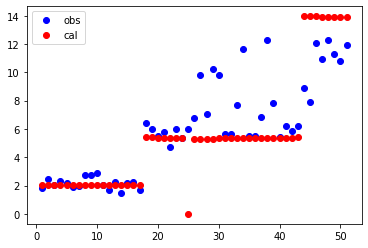

In [9]:

obsec = np.loadtxt(f'newepoch_{name}.txt')
obsdat = np.loadtxt(f'w34_{name}.txt')

#ast-sun
d_N = np.sqrt(obsec[:,0]**2+obsec[:,1]**2+obsec[:,2]**2)
#print('ast-sun',d_N)

#ast-earth
delta_N = np.sqrt((obsec[:,3]-obsec[:,0])**2+(obsec[:,4]-obsec[:,1])**2+(obsec[:,5]-obsec[:,2])**2)
#print('ast-earth',delta_N)

#earth-sun
dd_N = np.sqrt(obsec[:,3]**2+obsec[:,4]**2+obsec[:,5]**2)
#print('earth-sun',dd_N)

#alpha
alpha_N = (delta_N*delta_N+d_N*d_N-dd_N*dd_N)/(2*delta_N*d_N)
alpha_N = np.arccos(alpha_N)
#print("alpha",alpha_N/pi*180,'\n')
y = obsdat
nt = np.arange(len(d_N))
theta = [9.14,226]
flux = Model_neatm_ohhq(theta,x=(delta_N,d_N,alpha_N),lamda=lamdai)
x = (delta_N,d_N,alpha_N)
yerr = 0.1*y
#plt.plot(nt,flux,label = 'hhq')
#plt.plot(nt,flux,label = 'hhq')
print(flux)
plt.plot(nt[1:60],obsdat[1:60],'bo',label = 'obs')
plt.plot(nt[1:60],flux[1:60],'ro',label = 'cal')
#plt.plot(nt[0:len(d_N)],alpha_N[0:len(d_N)],'go',label = 'alpha')
#print(flux[0:len(d_N)])
plt.legend()
lenthi = [8,30,200]
dddd = (lenthi[1]-lenthi[0])/lenthi[2]
lenth = lenthi[0]
D = 136
pv = (1329*pow(10,-Hv/5)/(D*0.001))**2
q = 0.29+0.684*G
A = q*pv
flamda = []
nlenth  = []
for i in range(lenthi[2]):
    lenth = lenth+dddd
    nlenth.append(lenth)
    flamda.append((neatm_jhx(Ndd,d_N[1],delta_N[1],alpha_N[1],D,lenth,1.2,A)))
#plt.plot(nlenth,flamda,label = 'cal')  


## define MCMC_function

In [10]:
#initial
eta_gs = 1.2
D_gs = 150
eta_gss = [0.5,10]
D_gss = [1,800]

In [11]:
#MCMC Function
def log_likelihood(theta, x, y, yerr):
    eta,D= theta
    model = Model_neatm_ohhq(theta,x,lamdai)
    #model = eta*x[0]*100 + D
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))
def log_prior(theta):
    eta,D = theta
    if eta_gss[0]< eta < eta_gss[1] and D_gss[0] < D < D_gss[1]:
        return 0.0
    return -np.inf
    #return 0
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
     #   print('hi','-inf')
        return -np.inf
    yy=lp + log_likelihood(theta, x, y, yerr)
    #print('hi',yy)
    return yy


In [12]:
#initial para guesses
eta = eta_gs
D = D_gs
theta = [eta, D]

In [13]:
import emcee
#initialize sampler
ndim, nwalkers = len(theta), 10
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
pos = [theta + 1e-6*np.random.randn(ndim) for i in range(nwalkers)]
#run mcmc
sampler.run_mcmc(pos, 1000, progress=True);

/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
100%|██████████| 1000/1000 [13:43<00:00,  1.21it/s]


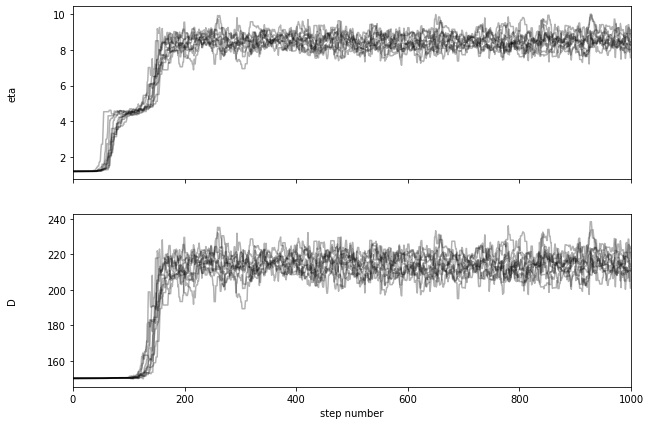

In [14]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["eta", "D"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("step number");

(260, 2)


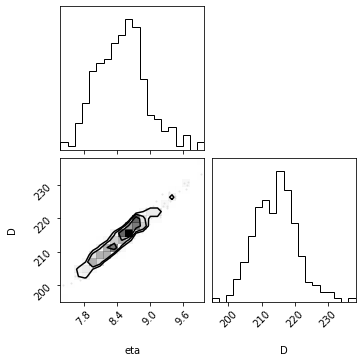

In [15]:
#--------------------------
flat_samples = sampler.get_chain(discard=600, thin=15, flat=True)
print(flat_samples.shape)
import corner
fig = corner.corner(
flat_samples, labels=labels, truths=[eta_gs, 103816]
);

## truth 0.213

In [16]:
from IPython.display import display, Math
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    #print(mcmc[1],q[0],q[1],labels[i])
    display(Math(txt))
print(Math(txt))
D_low,D_fit,D_high = np.percentile(flat_samples[:, 1], [16, 50, 84])
pv = (1329*pow(10,-Hv/5)/(D_fit*0.001))**2
print('eta_gs = ',eta_gs,'D_gs= ',D_gs,'pv=',pv)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>
eta_gs =  1.2 D_gs=  150 pv= 0.1159044159216217


In [17]:
import pandas as pd
rawdata = pd.read_csv(f'time_{name}.txt')
timelist = rawdata['mjd'].tolist()

len(timelist)
timelist

[55341.57704,
 55341.643255,
 55341.709343,
 55341.775559,
 55342.040167,
 55342.238559,
 55342.304775,
 55342.569383,
 55342.635471,
 55342.635598,
 55342.701686,
 55342.767775,
 55342.767902,
 55342.83399,
 55342.900206,
 55342.966294,
 55343.03251,
 55343.230902,
 55413.823939,
 55413.824066,
 55413.95637,
 55414.088674,
 55414.220978,
 55414.287193,
 55414.353281,
 55414.419497]

eta_fit =  8.475975179311046 D_fit=  214.52355710130809 pv =  0.1159044159216217
loss =  inf


/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/2323080340.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return sum(((cal-y)/yerr)**2)/nn
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encount

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '55341.57704'),
  Text(1, 0, '55341.643255'),
  Text(2, 0, '55341.709343'),
  Text(3, 0, '55341.775559'),
  Text(4, 0, '55342.040167'),
  Text(5, 0, '55342.238559'),
  Text(6, 0, '55342.304775'),
  Text(7, 0, '55342.569383'),
  Text(8, 0, '55342.635471'),
  Text(9, 0, '55342.635598'),
  Text(10, 0, '55342.701686'),
  Text(11, 0, '55342.767775'),
  Text(12, 0, '55342.767902'),
  Text(13, 0, '55342.83399'),
  Text(14, 0, '55342.900206'),
  Text(15, 0, '55342.966294'),
  Text(16, 0, '55343.03251'),
  Text(17, 0, '55343.230902'),
  Text(18, 0, '55413.823939'),
  Text(19, 0, '55413.824066'),
  Text(20, 0, '55413.95637'),
  Text(21, 0, '55414.088674'),
  Text(22, 0, '55414.220978'),
  Text(23, 0, '55414.287193'),
  Text(24, 0, '55414.353281'),
  Text(25, 0, '55414.419497')])

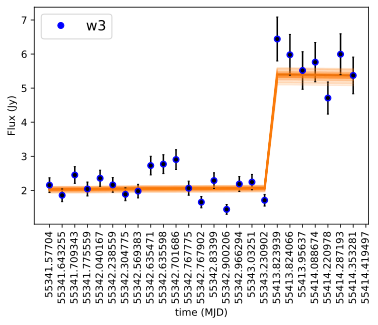

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def loss(cal,y,yerr):
    nn = len(y)
    return sum(((cal-y)/yerr)**2)/nn
eta_low,eta_fit,eta_high = np.percentile(flat_samples[:, 0], [16, 50, 84])
D_low,D_fit,D_high = np.percentile(flat_samples[:, 1], [16, 50, 84])
print('eta_fit = ',eta_fit,'D_fit= ',D_fit,'pv = ',(1329*pow(10,-Hv/5)/(D_fit*0.001))**2)
theta = eta_fit,D_fit

leni = len(nt)
half = int(leni/2)
yt = Model_neatm_ohhq(theta,x,lamdai)
print('loss = ',loss(yt,y,yt*0.1))
plt.plot(nt[0:half-1], yt[0:half-1],"k")

inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    #print(ind,':',sample)
    plotmodel = Model_neatm_ohhq(sample,x,lamdai)
    plt.plot(nt[0:half-1], plotmodel[0:half-1], "C1", alpha=0.1)
plt.plot(nt[0:half-1],y[0:half-1],'bo',label = 'w3')
plt.errorbar(nt[0:half-1], y[0:half-1], yerr=yerr[0:half-1], fmt=".k", capsize=1.0)
plt.legend(fontsize=14)
plt.xlabel("time (MJD)")
plt.ylabel("Flux (Jy)");
#ax.xaxis.set_major_locator(plt.MultipleLocator(4))
plt.xticks(nt[0:half],timelist[0:half])
plt.xticks(rotation=90)
#plt.savefig(f'{name}_w3.pdf')

/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: RuntimeWarning: overflow encountered in exp
  integral = np.cos(phii)**2*np.cos(alpha-thei)/(np.exp(h*cl/(lamda*kB*T))-1)
/tmp/ipykernel_5696/1970839062.py:16: Ru

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '55341.57704'),
  Text(1, 0, '55341.643255'),
  Text(2, 0, '55341.709343'),
  Text(3, 0, '55341.775559'),
  Text(4, 0, '55342.040167'),
  Text(5, 0, '55342.238559'),
  Text(6, 0, '55342.304775'),
  Text(7, 0, '55342.569383'),
  Text(8, 0, '55342.635471'),
  Text(9, 0, '55342.635598'),
  Text(10, 0, '55342.701686'),
  Text(11, 0, '55342.767775'),
  Text(12, 0, '55342.767902'),
  Text(13, 0, '55342.83399'),
  Text(14, 0, '55342.900206'),
  Text(15, 0, '55342.966294'),
  Text(16, 0, '55343.03251'),
  Text(17, 0, '55343.230902'),
  Text(18, 0, '55413.823939'),
  Text(19, 0, '55413.824066'),
  Text(20, 0, '55413.95637'),
  Text(21, 0, '55414.088674'),
  Text(22, 0, '55414.220978'),
  Text(23, 0, '55414.287193'),
  Text(24, 0, '55414.353281'),
  Text(25, 0, '55414.419497')])

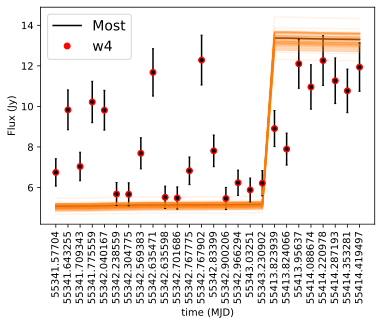

In [19]:
plt.plot(nt[0:half], yt[half:leni],"k", label="Most")

inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    #print(ind,':',sample)
    plotmodel = Model_neatm_ohhq(sample,x,lamdai)
    plt.plot(nt[0:half], plotmodel[half:leni], "C1", alpha=0.1)
plt.plot(nt[0:half],y[half:leni],'ro',label = 'w4')
plt.errorbar(nt[0:half], y[half:leni], yerr=yerr[half:leni], fmt=".k", capsize=1.0)
plt.legend(fontsize=14)
plt.xlabel("time (MJD)")
plt.ylabel("Flux (Jy)");
#ax.xaxis.set_major_locator(plt.MultipleLocator(4))
plt.xticks(nt[0:half],timelist[0:half])
plt.xticks(rotation=90)
#plt.savefig(f'{name}_w4.pdf')
